# Finds optical events in a video file

### Imports

In [9]:
# Python standard library
import sys
import os

# Scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', '')
sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/oi/')
import optical_imaging as oi
import oi_file

# Jupyter
from IPython.display import HTML

### Load data

In [3]:
# Define file path
data_base_path = '/home/prestonh/Desktop/Research/cancer_cells/data'
date = '/7-7-2017'
particle_type = '/293-T'
channel_type = '/15-30-15_1'
file_index = '0'
file_path = data_base_path + date + particle_type + channel_type + '/oi/bin/test_camera_' + file_index

# Set output file path
output_file_path = file_path + '_events.json'

# Open video
oi_vid = oi_file.Raw(file_path, 512, 288, 50000, 5)

### Find a frame that has a cluster

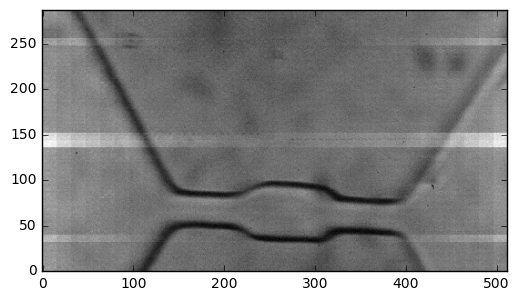

In [37]:
template_index = 750
template_frame = oi_vid.get_frame(template_index)
plt.imshow(template_frame, cmap = 'gray', origin = 'lower')
plt.show()

In [38]:
threshold_difference = 0.010

start_frame = 0

num_found = 0

for i in range(start_frame, oi_vid._total_frames):
    
    
    if i%1000 == 0:
        print i
    frame = oi_vid.get_frame(i)
    clusters = oi.find_clusters_percentage_based(frame, template_frame, cluster_threshold = 50, threshold_difference = threshold_difference)
    if(len(clusters)) > 0:
        print i
        num_found+=1
        if num_found > 100:
            break
            pass
            

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


KeyboardInterrupt: 

### Show image, template image, difference

1


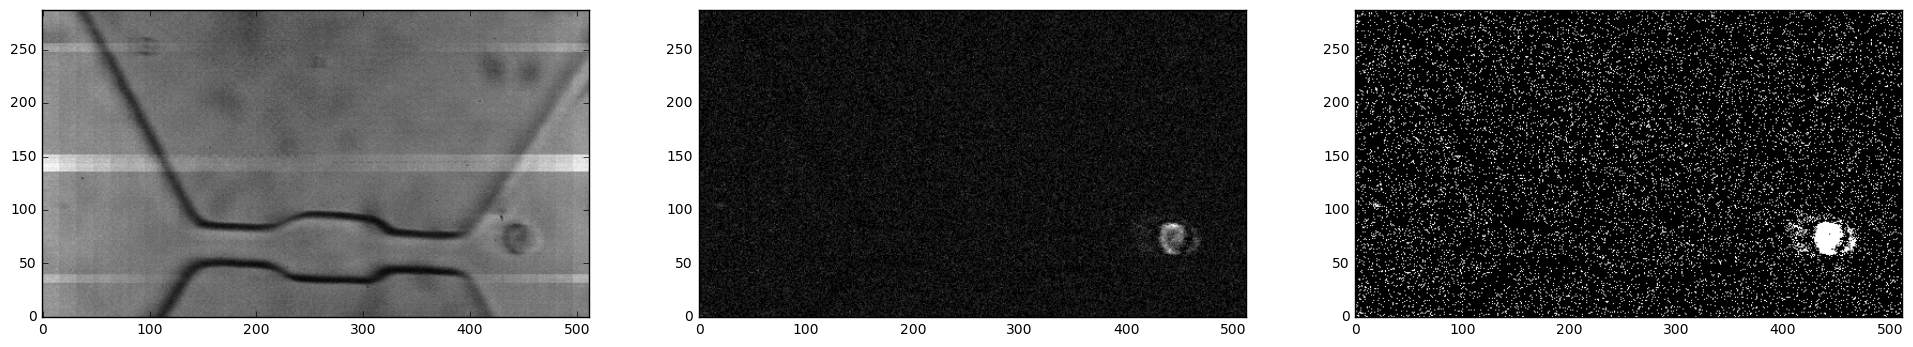

In [41]:
index = 35

template_frame = oi_vid.get_frame(template_index)
frame = oi_vid.get_frame(index)

threshold_difference = .005#.035
alpha = 1#2



beta = 'avg'    # -(np.mean(frame)-.5)
#template_frame = oi.change_frame_contrast(template_frame, alpha = alpha, beta = beta)
#frame = oi.change_frame_contrast(frame, alpha = alpha, beta = beta)


cluster_threshold = 100


neg_frame = abs(frame - template_frame)
clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                             cluster_threshold = cluster_threshold)
temp_neg_frame = np.copy(neg_frame)
temp_neg_frame[temp_neg_frame > threshold_difference] = 1
temp_neg_frame[temp_neg_frame <= threshold_difference] = 0

print len(clusters)
fig, axes = plt.subplots(1,3,figsize=(24,8))

# Raw image
plt.sca(axes[0])
plt.imshow(frame, cmap = 'gray', origin = 'lower')

# Negative
plt.sca(axes[1])
plt.imshow(neg_frame, cmap = 'gray', origin = 'lower')

# Thresholded negative
plt.sca(axes[2])
plt.imshow(temp_neg_frame, vmin = 0, vmax = 1, cmap = 'gray', origin = 'lower')

plt.show()

### Find events

In [8]:
reload(oi)
alpha = 1
beta = 'avg'
oi_events = oi.find_events(oi_vid, ti = 0, template_frame = oi_vid.get_frame(template_index), threshold_difference = threshold_difference, cluster_threshold = cluster_threshold, alpha = alpha, beta = 'avg')

/home/prestonh/Desktop/Research/pore_stats//pore_stats/oi/optical_imaging.py:1204: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template_frame == None:
/home/prestonh/Desktop/Research/pore_stats//pore_stats/oi/optical_imaging.py:62: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


t:  0 / 199893 	clusters: 1 	active: 0 	inactive: 0
t:  1000 / 199893 	clusters: 3 	active: 5 	inactive: 4
t:  2000 / 199893 	clusters: 0 	active: 0 	inactive: 99
t:  3000 / 199893 	clusters: 9 	active: 9 	inactive: 115
t:  4000 / 199893 	clusters: 1 	active: 1 	inactive: 226
t:  5000 / 199893 	clusters: 0 	active: 0 	inactive: 292
t:  6000 / 199893 	clusters: 0 	active: 0 	inactive: 293
t:  7000 / 199893 	clusters: 0 	active: 0 	inactive: 293
t:  8000 / 199893 	clusters: 1 	active: 1 	inactive: 306
t:  9000 / 199893 	clusters: 0 	active: 0 	inactive: 315
t:  10000 / 199893 	clusters: 0 	active: 0 	inactive: 315
t:  11000 / 199893 	clusters: 1 	active: 1 	inactive: 329
t:  12000 / 199893 	clusters: 0 	active: 0 	inactive: 338
t:  13000 / 199893 	clusters: 1 	active: 1 	inactive: 338
t:  14000 / 199893 	clusters: 0 	active: 0 	inactive: 339
t:  15000 / 199893 	clusters: 3 	active: 4 	inactive: 342
t:  16000 / 199893 	clusters: 1 	active: 1 	inactive: 383
t:  17000 / 199893 	clusters: 1 

### Inspect trajectories

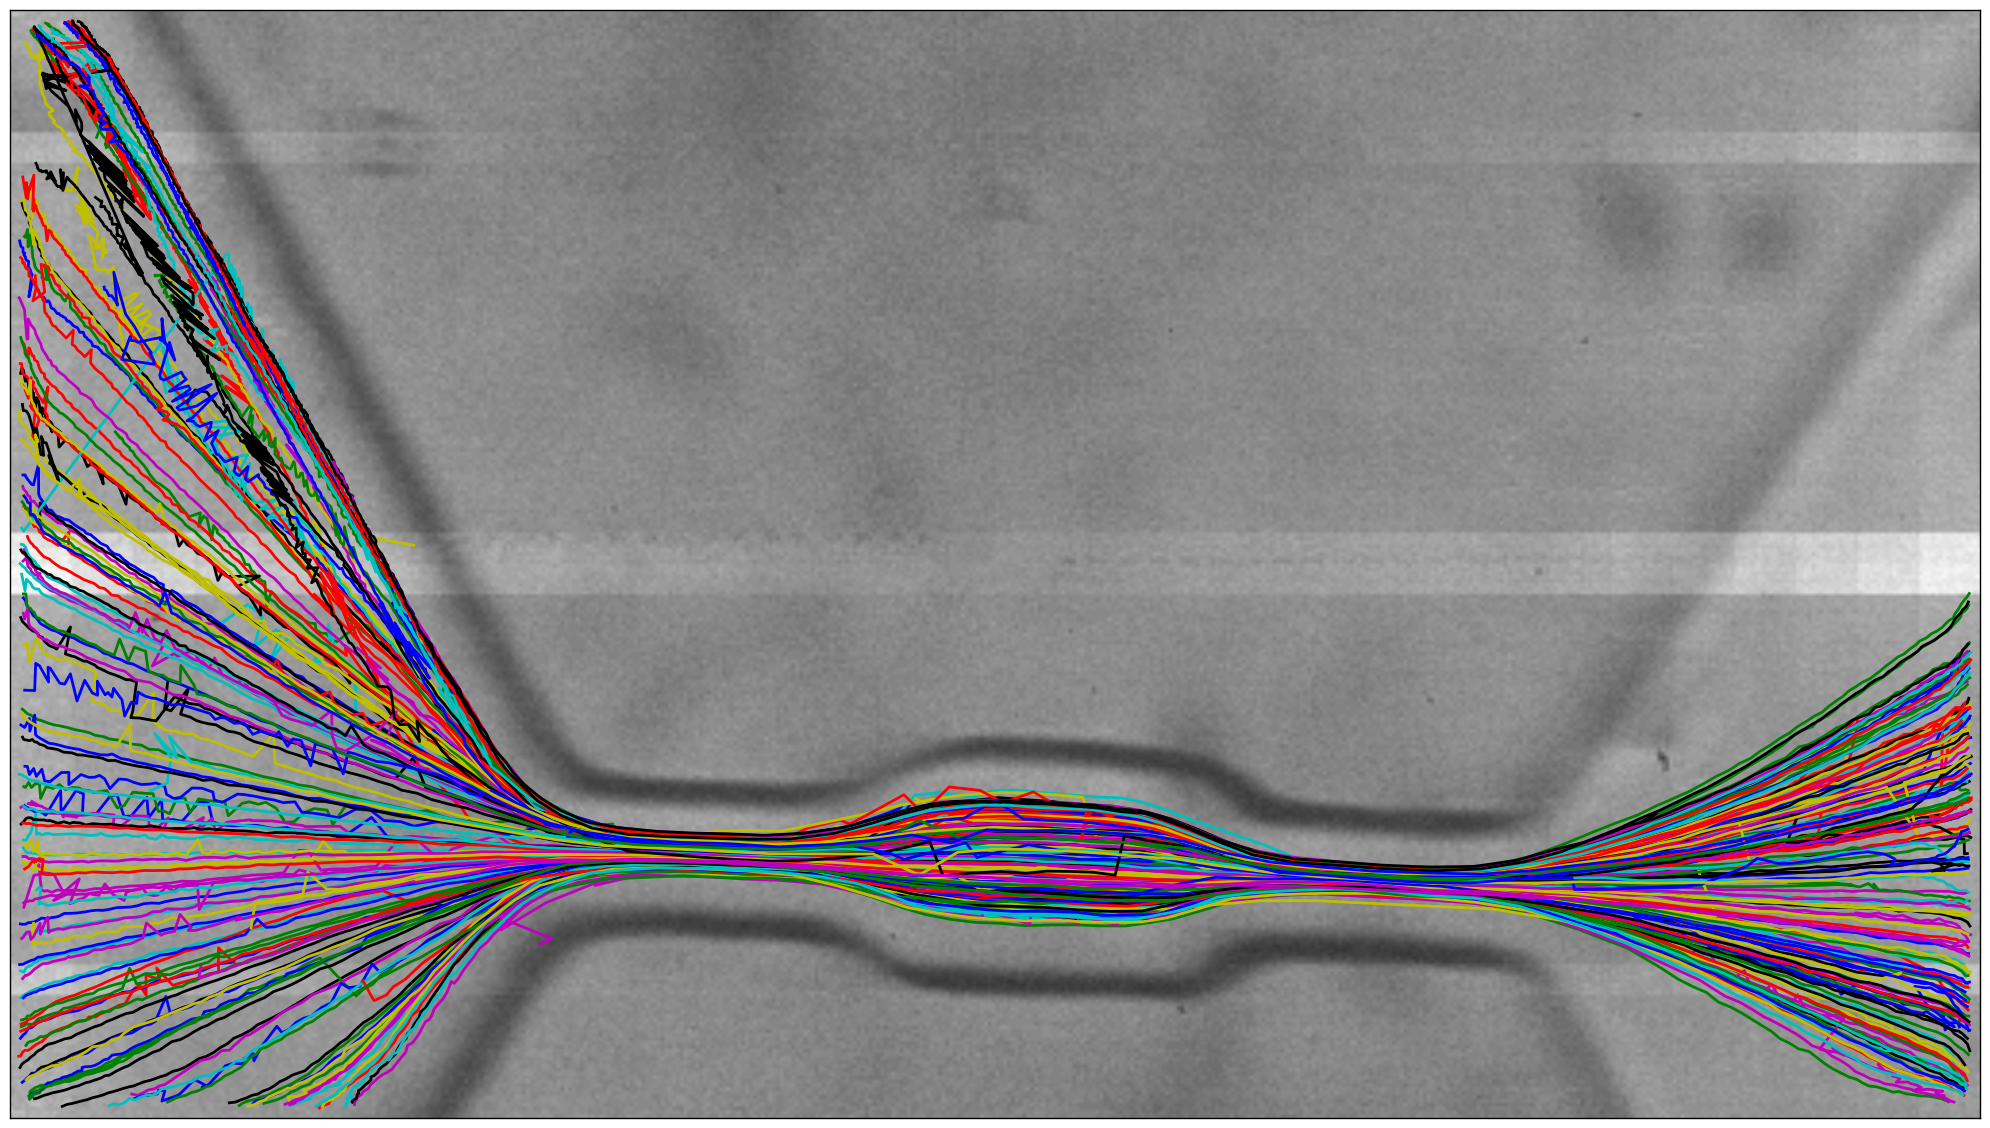

In [49]:
fig = plt.figure(figsize = (20,12))
for i, event in enumerate(filtered_oi_events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 2)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()


plt.show()

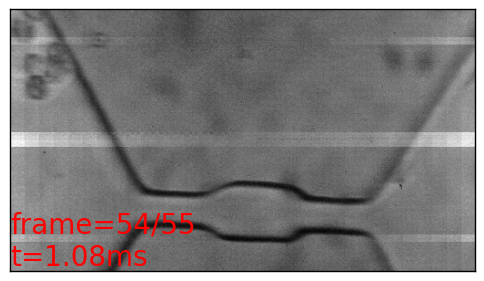

In [42]:
oi_index = 5

plt.close()
HTML(oi_file.make_animation(oi_vid, oi_events[oi_index]._detections[0]._tf, oi_events[oi_index]._detections[-1]._tf).to_html5_video())

### Filter events

In [ ]:
reload(oi)
template_index = 0
template_frame = oi_vid.get_frame(template_index)
c0 = [155, 83]
c1 = [150, 55]
c2 = [393, 45] 
c3 = [397, 72]
oi_stage = oi.Stage(template_frame, c0, c1, c2, c3)
oi_stage._length_microns = 150
oi_stage.plot_stage()

In [24]:
for oi_event in oi_events:
    oi_event.get_channel_enter_exit_tf(oi_stage)

In [25]:
filtered_oi_events = [oi_event for oi_event in oi_events if (oi_event._channel_enter_tf != None) and (oi_event._channel_exit_tf != None)]

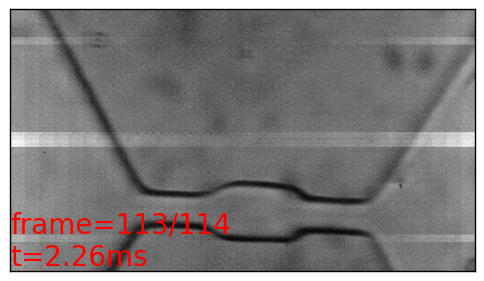

In [52]:
oi_index = 150
reload(oi_file)
plt.close()
HTML(oi_file.make_animation(oi_vid, filtered_oi_events[oi_index]._detections[0]._tf, filtered_oi_events[oi_index]._detections[-1]._tf).to_html5_video())

### Save events

In [37]:
print output_file_path

/home/prestonh/Desktop/Research/cancer_cells/data/6-30-2017/293-T/17p5-30-17p5_4/oi/bin/test_camera_0_events.json


In [39]:
oi_file.save_oi_events_json(output_file_path, filtered_oi_events)